In [1]:
from sklearn.linear_model import LogisticRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, \
roc_curve, auc, precision_recall_curve, f1_score, make_scorer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Exercise 1

### Prepare data

In [2]:
data = pd.read_csv("pima-indians-diabetes.csv", header=None)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Fit model and predict

In [3]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

h_train = log_reg.predict_proba(X_train)[:, 1]
h_test = log_reg.predict_proba(X_test)[:, 1]

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

### Evaluation metrics

Log-loss, classification accuracy and RMSE

In [4]:
print("Train log-loss: ", log_loss(y_train, h_train))
print("Test log-loss: ", log_loss(y_test, h_test))

print("Train classification accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test classification accuracy: ", accuracy_score(y_test, y_pred_test))

print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, h_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, h_test)))

Train log-loss:  0.5019473138052437
Test log-loss:  0.4825560160938185
Train classification accuracy:  0.75
Test classification accuracy:  0.788961038961039
Train RMSE:  0.40521288910558023
Test RMSE:  0.3934772082247534


ROC, AUC and Precision-Recall curve and F1 score

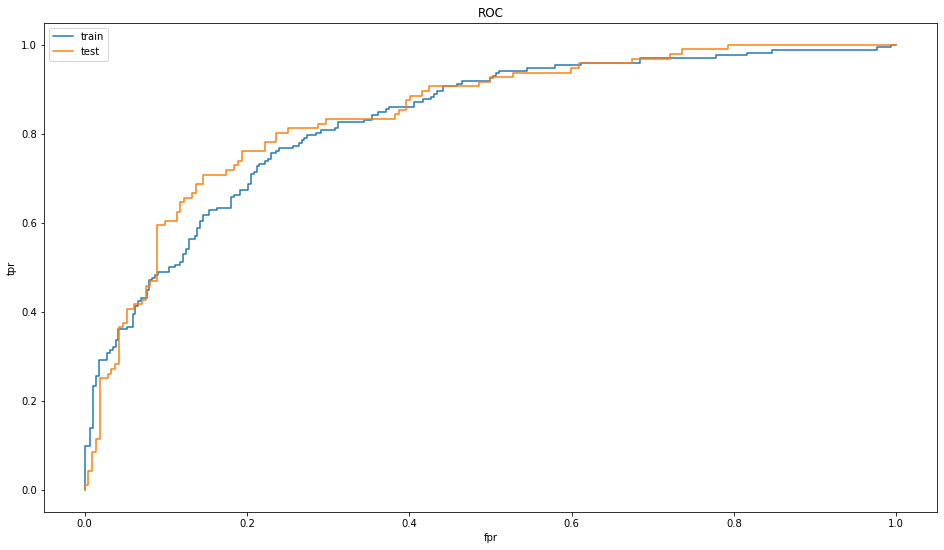

In [5]:
fpr_train, tpr_train, _ = roc_curve(y_train, h_train)
fpr_test, tpr_test, _ = roc_curve(y_test, h_test)

plt.figure(figsize=(16, 9))
plt.plot(fpr_train, tpr_train, label="train")
plt.plot(fpr_test, tpr_test, label="test")
plt.title("ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [6]:
print("Train AUC: ", auc(fpr_train, tpr_train))
print("Test AUC: ", auc(fpr_test, tpr_test))

Train AUC:  0.8298812984496124
Test AUC:  0.8436517295597485


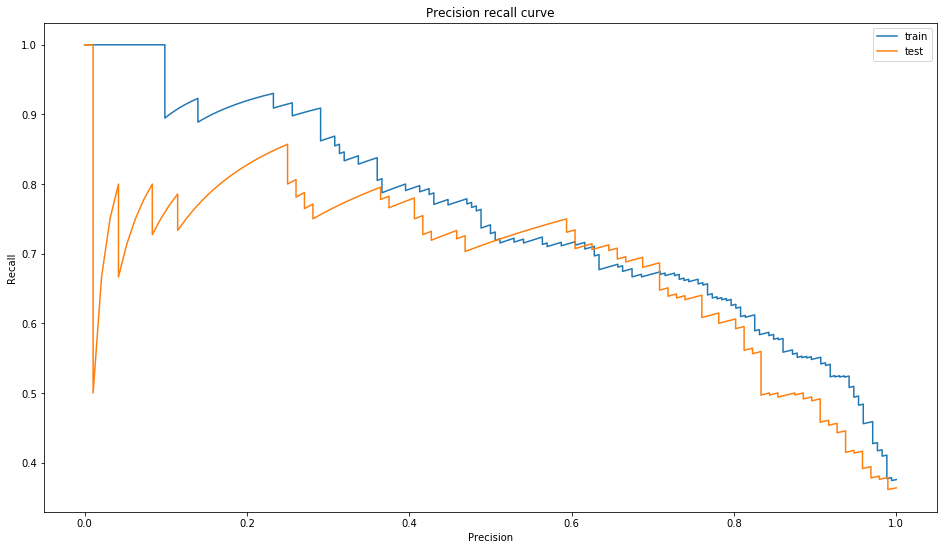

In [7]:
precision_train, recall_train, _ = precision_recall_curve(y_train, h_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, h_test)

plt.figure(figsize=(16, 9))
plt.plot(recall_train, precision_train, label="train")
plt.plot(recall_test, precision_test, label="test")
plt.title("Precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

In [8]:
print("Train f1 score: ", f1_score(y_train, y_pred_train))
print("Test f1 score: ", f1_score(y_test, y_pred_test))

Train f1 score:  0.617940199335548
Test f1 score:  0.6798029556650246


### Class imbalance

remove half of the positive classes

In [9]:
index_to_drop = np.where(y == 1)[0][:int(len(np.where(y == 1)[0]) / 2)]
y_imb = np.delete(y, index_to_drop, axis=0)
X_imb = np.delete(X, index_to_drop, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.4)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

h_train = log_reg.predict_proba(X_train)[:, 1]
h_test = log_reg.predict_proba(X_test)[:, 1]

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

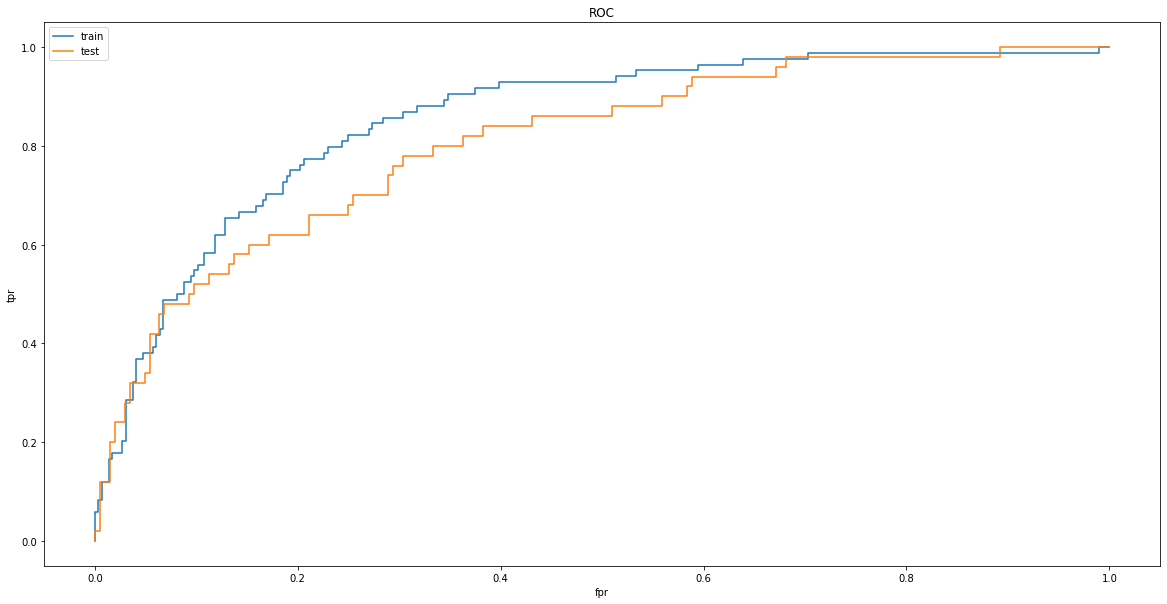

In [11]:
fpr_train, tpr_train, _ = roc_curve(y_train, h_train)
fpr_test, tpr_test, _ = roc_curve(y_test, h_test)

plt.figure(figsize=(20, 10))
plt.plot(fpr_train, tpr_train, label="train")
plt.plot(fpr_test, tpr_test, label="test")
plt.title("ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [12]:
print("Train AUC: ", auc(fpr_train, tpr_train))
print("Test AUC: ", auc(fpr_test, tpr_test))

Train AUC:  0.8522763835263836
Test AUC:  0.8058823529411764


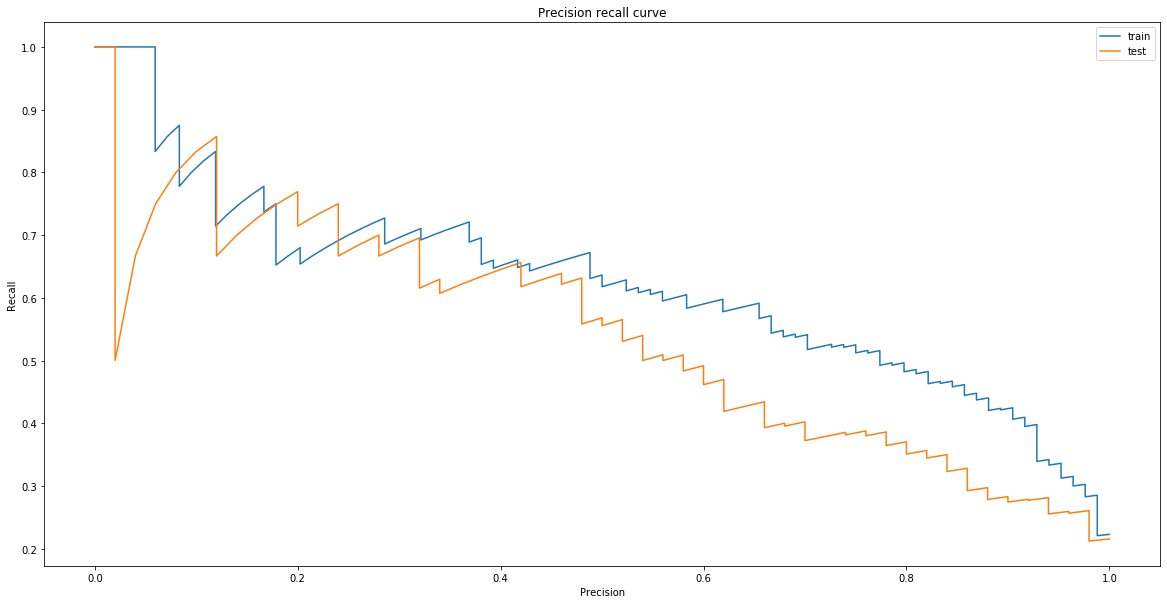

In [13]:
precision_train, recall_train, _ = precision_recall_curve(y_train, h_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, h_test)

plt.figure(figsize=(20, 10))
plt.plot(recall_train, precision_train, label="train")
plt.plot(recall_test, precision_test, label="test")
plt.title("Precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

In [14]:
print("Train f1 score: ", f1_score(y_train, y_pred_train))
print("Test f1 score: ", f1_score(y_test, y_pred_test))

Train f1 score:  0.41666666666666663
Test f1 score:  0.4266666666666667


### Cross validation

In [15]:
cv_scores = cross_validate(LogisticRegression(), X, y, cv=10, 
                           scoring=("neg_log_loss", "accuracy", "neg_mean_squared_error"))

In [16]:
print("CV log loss", (-cv_scores['test_neg_log_loss']).mean())
print("CV accuracy", (cv_scores['test_accuracy']).mean())
print("CV rmse", (np.sqrt(-cv_scores['test_neg_mean_squared_error'])).mean())

CV log loss 0.4920919653592632
CV accuracy 0.7669685577580314
CV rmse 0.4812577494880329


# Exercise 2

Lasso

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
lasso = LassoCV()
lasso.fit(X_train, y_train)

h_train_lasso = lasso.predict(X_train)
h_test_lasso = lasso.predict(X_test)

y_pred_train_lasso = np.where(h_train_lasso > 0.5, 1, 0)
y_pred_test_lasso = np.where(h_test_lasso > 0.5, 1, 0)

In [18]:
print("Train classification accuracy: ", accuracy_score(y_train, y_pred_train_lasso))
print("Test classification accuracy: ", accuracy_score(y_test, y_pred_test_lasso))

print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, h_train_lasso)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, h_test_lasso)))

Train classification accuracy:  0.7521739130434782
Test classification accuracy:  0.788961038961039
Train RMSE:  0.4046305702337236
Test RMSE:  0.3910571160402542


Ridge

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
ridge = RidgeCV()
ridge.fit(X_train, y_train)

h_train_ridge = ridge.predict(X_train)
h_test_ridge = ridge.predict(X_test)

y_pred_train_ridge = np.where(h_train_ridge > 0.5, 1, 0)
y_pred_test_ridge = np.where(h_test_ridge > 0.5, 1, 0)

In [20]:
print("Train classification accuracy: ", accuracy_score(y_train, y_pred_train_ridge))
print("Test classification accuracy: ", accuracy_score(y_test, y_pred_test_ridge))

print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, h_train_ridge)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, h_test_ridge)))

Train classification accuracy:  0.7869565217391304
Test classification accuracy:  0.7694805194805194
Train RMSE:  0.3964539336773935
Test RMSE:  0.40422376361312423
